# <font color='Blue'> XG Boost Classification </font>

# <font color='Blue'>    </font>

 ### <font color='magenta'>1.Importing Libraries   </font>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier  

# <font color='Blue'>    </font>

### <font color='magenta'>2.Import Data Set   </font>

In [14]:
# Load the Breast Cancer dataset

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# <font color='Blue'>    </font>

### <font color='magenta'>3.Split Target Variables and Feature Variables   </font>

In [15]:
# Define feature variables and target variable

X = df.drop('target', axis=1)
y = df['target']

# <font color='Blue'>    </font>

### <font color='magenta'>4.Explore Feature Variables   </font>

In [17]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display feature names
print("Feature Names:", df.columns[:-1])

# Display statistical summary of the features
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# <font color='Blue'>    </font>

**Visualize Feature Distributions**

Using histograms and box plots can help identify distributions and outliers.

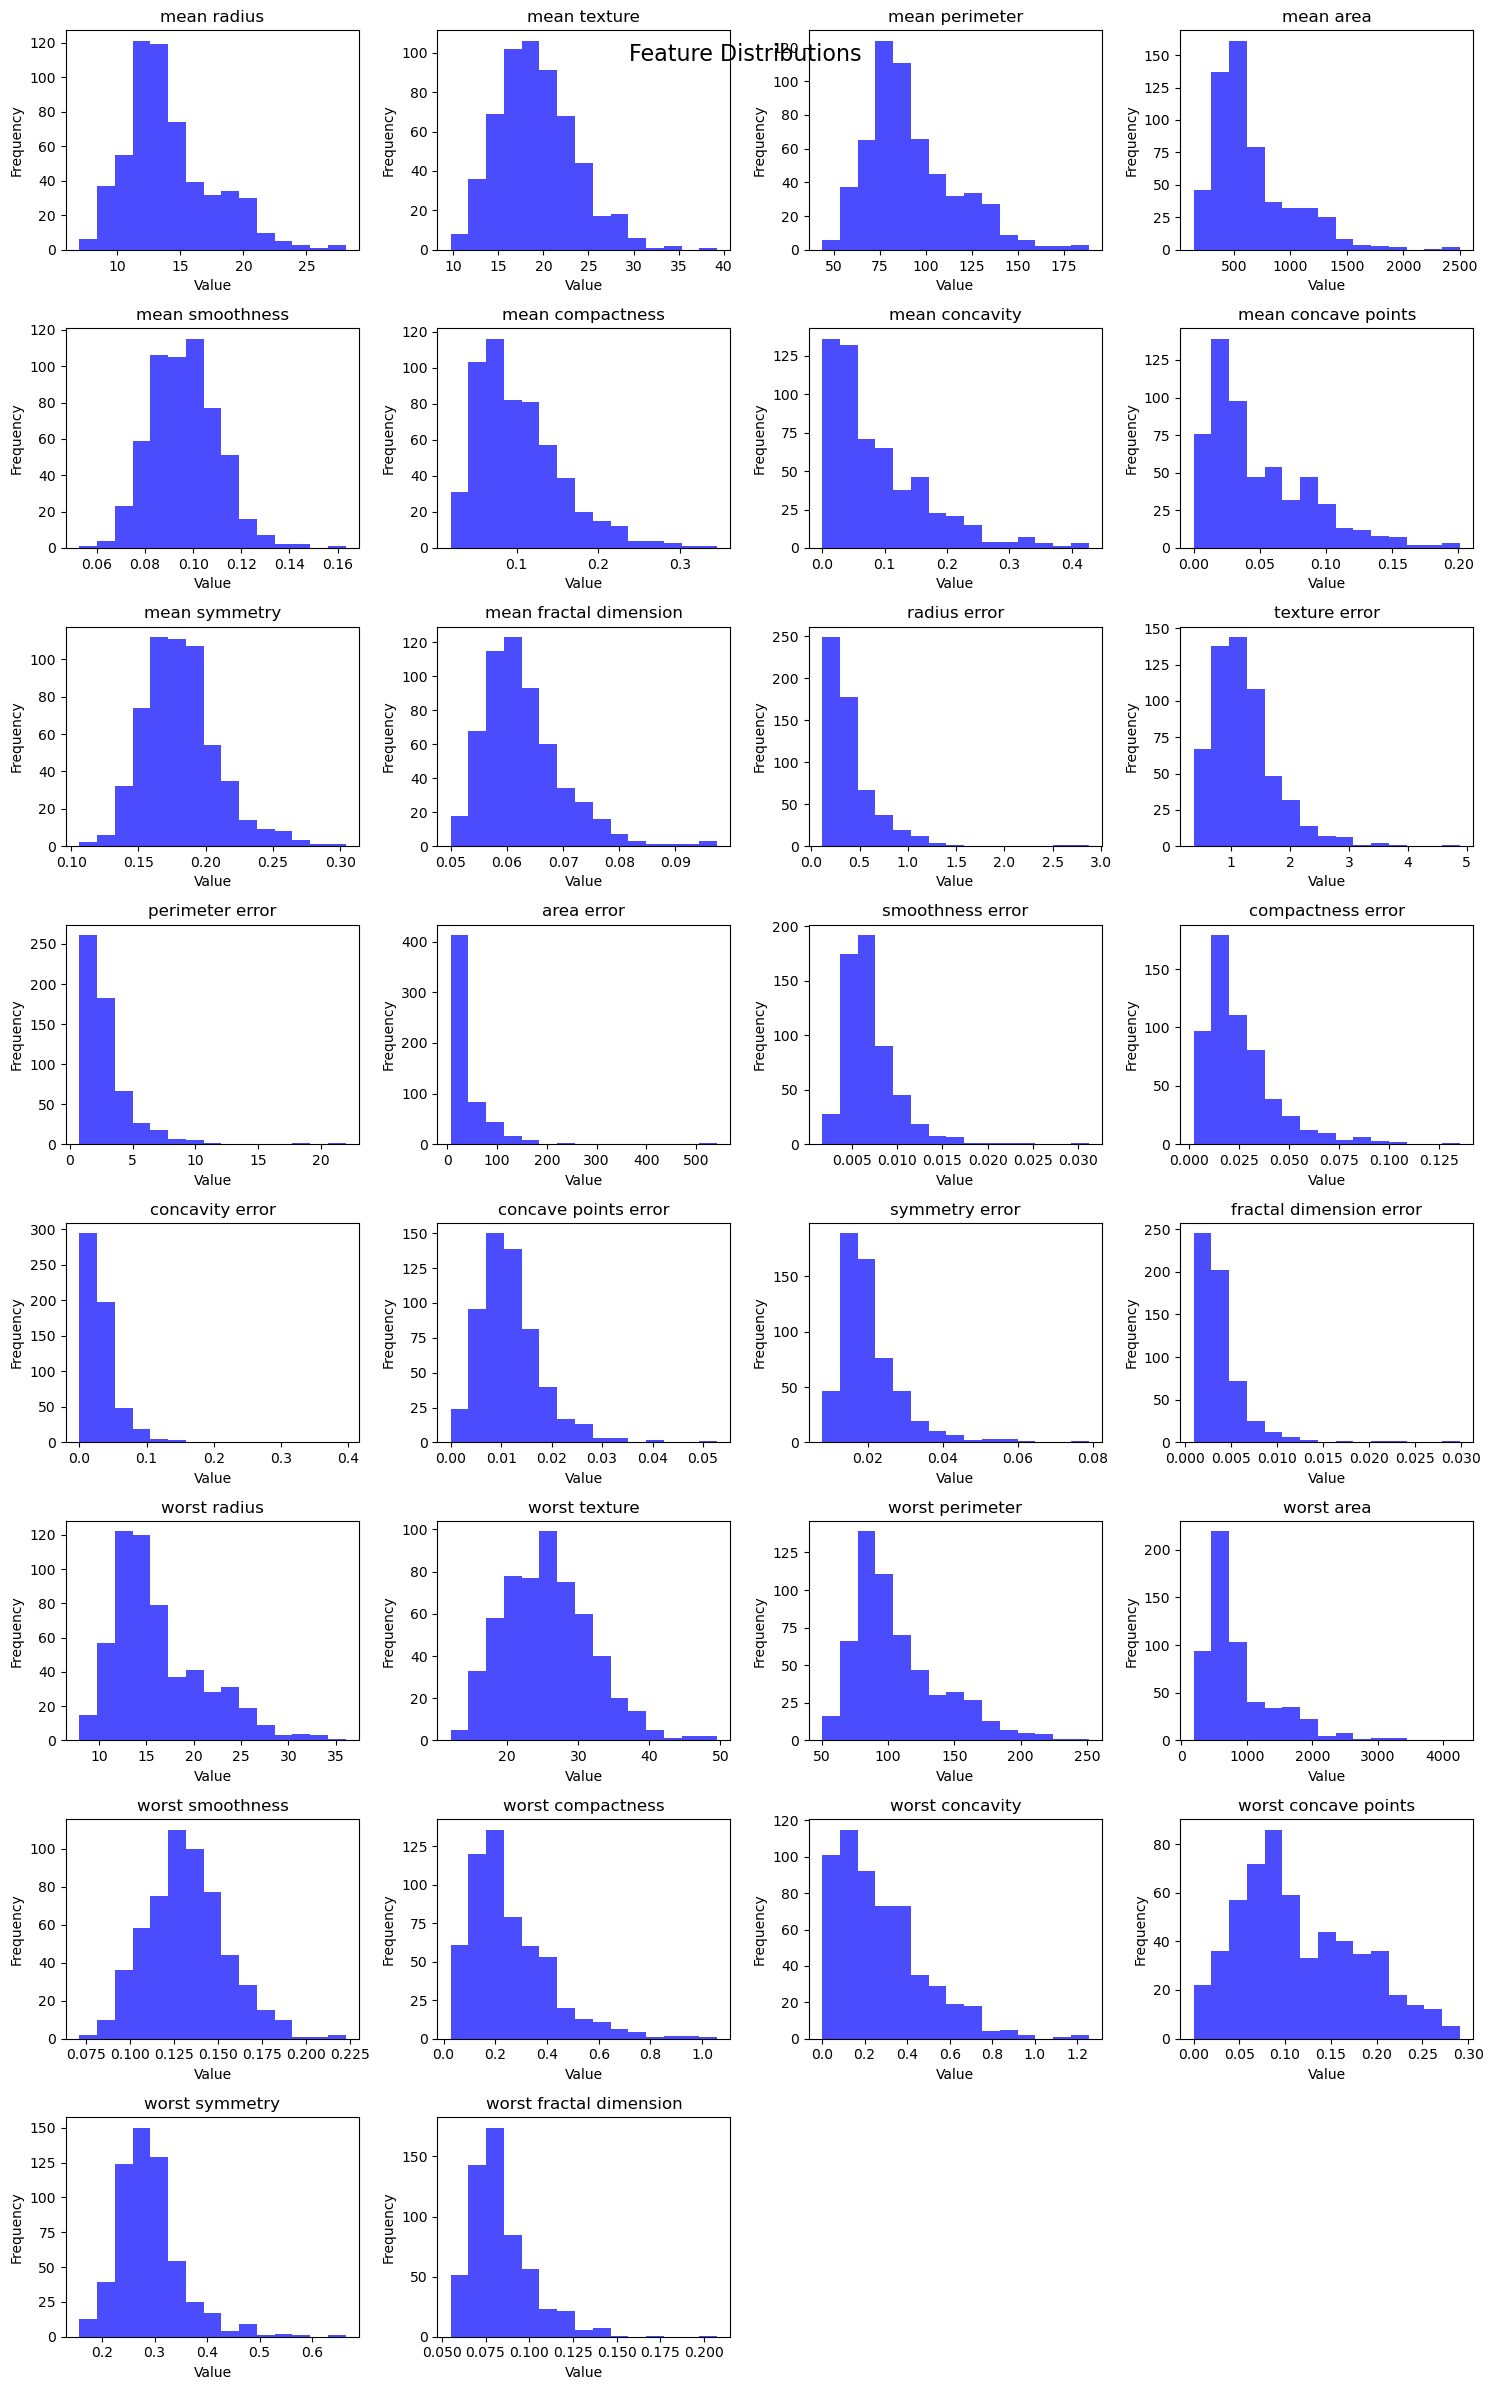

In [19]:
# Histograms for each feature
num_features = X.shape[1]
num_cols = 4  # Number of columns for the histogram layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate required rows

# Create histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=15, color='blue', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

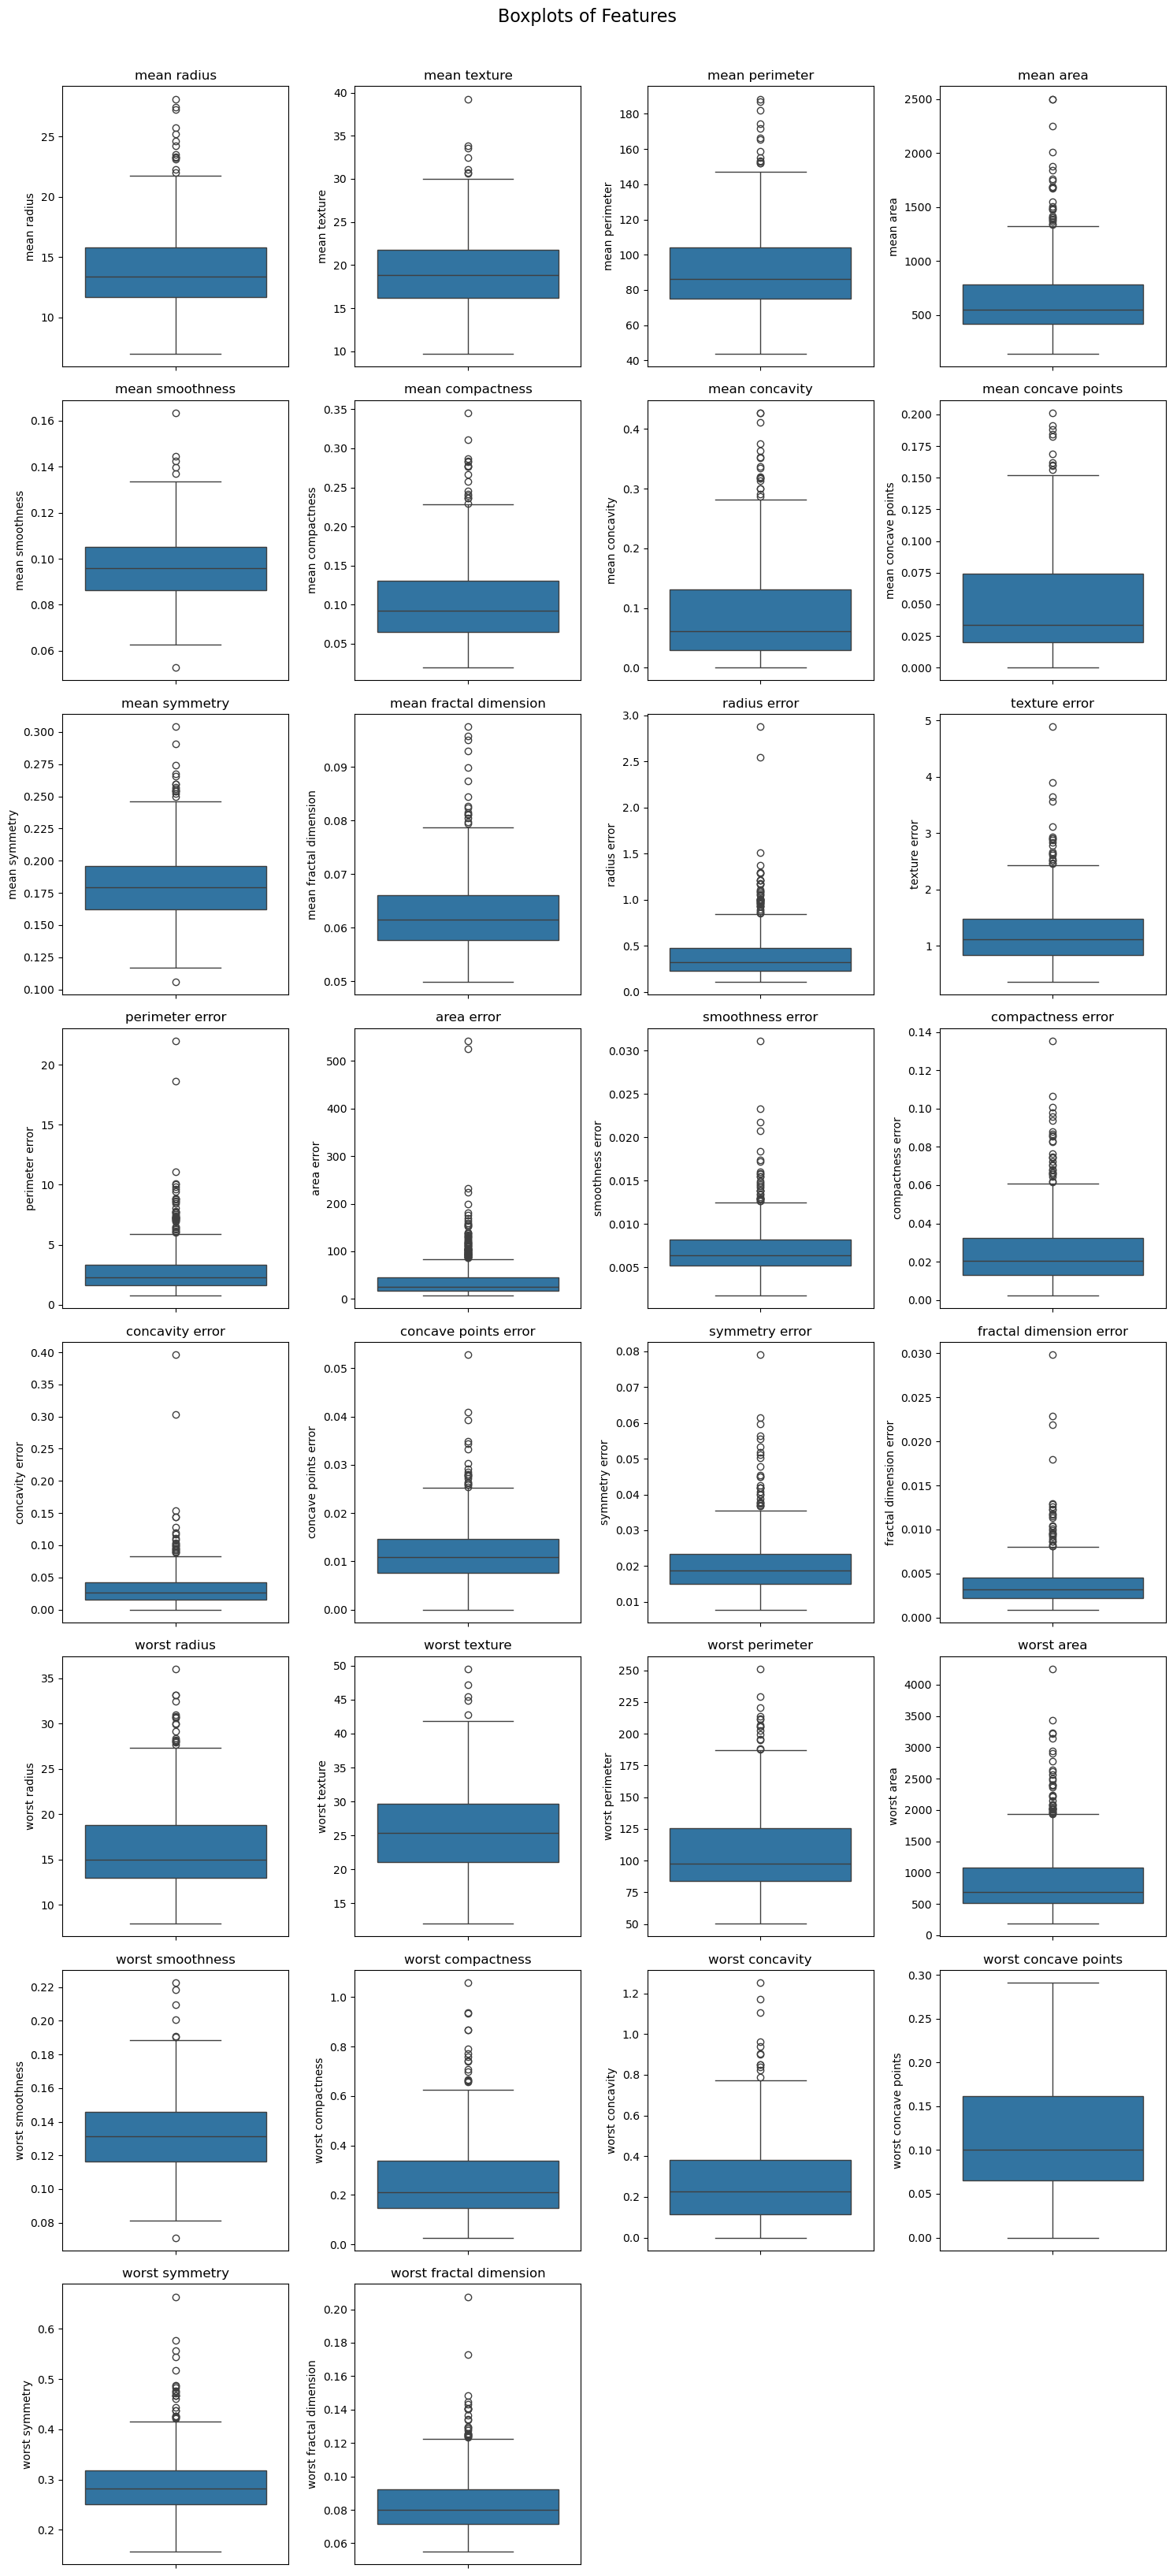

In [21]:
# Boxplots for each feature to visualize outliers
num_features = X.shape[1]
num_cols = 4  # Number of columns for the boxplot layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.suptitle('Boxplots of Features', fontsize=16, y=1.02)
plt.show()

# <font color='Blue'>    </font>

### <font color='magenta'>5.Explore Target Variable   </font>

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


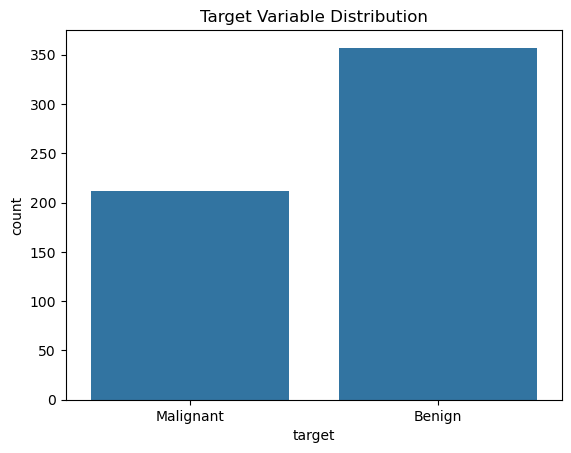

In [24]:
# Display the target variable distribution
print(df['target'].value_counts(normalize=True))

# Visualize target variable distribution
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

**Relationship with Features**

Explore how the target variable relates to the features. You can use violin plots to show distributions for malignant and benign tumors.

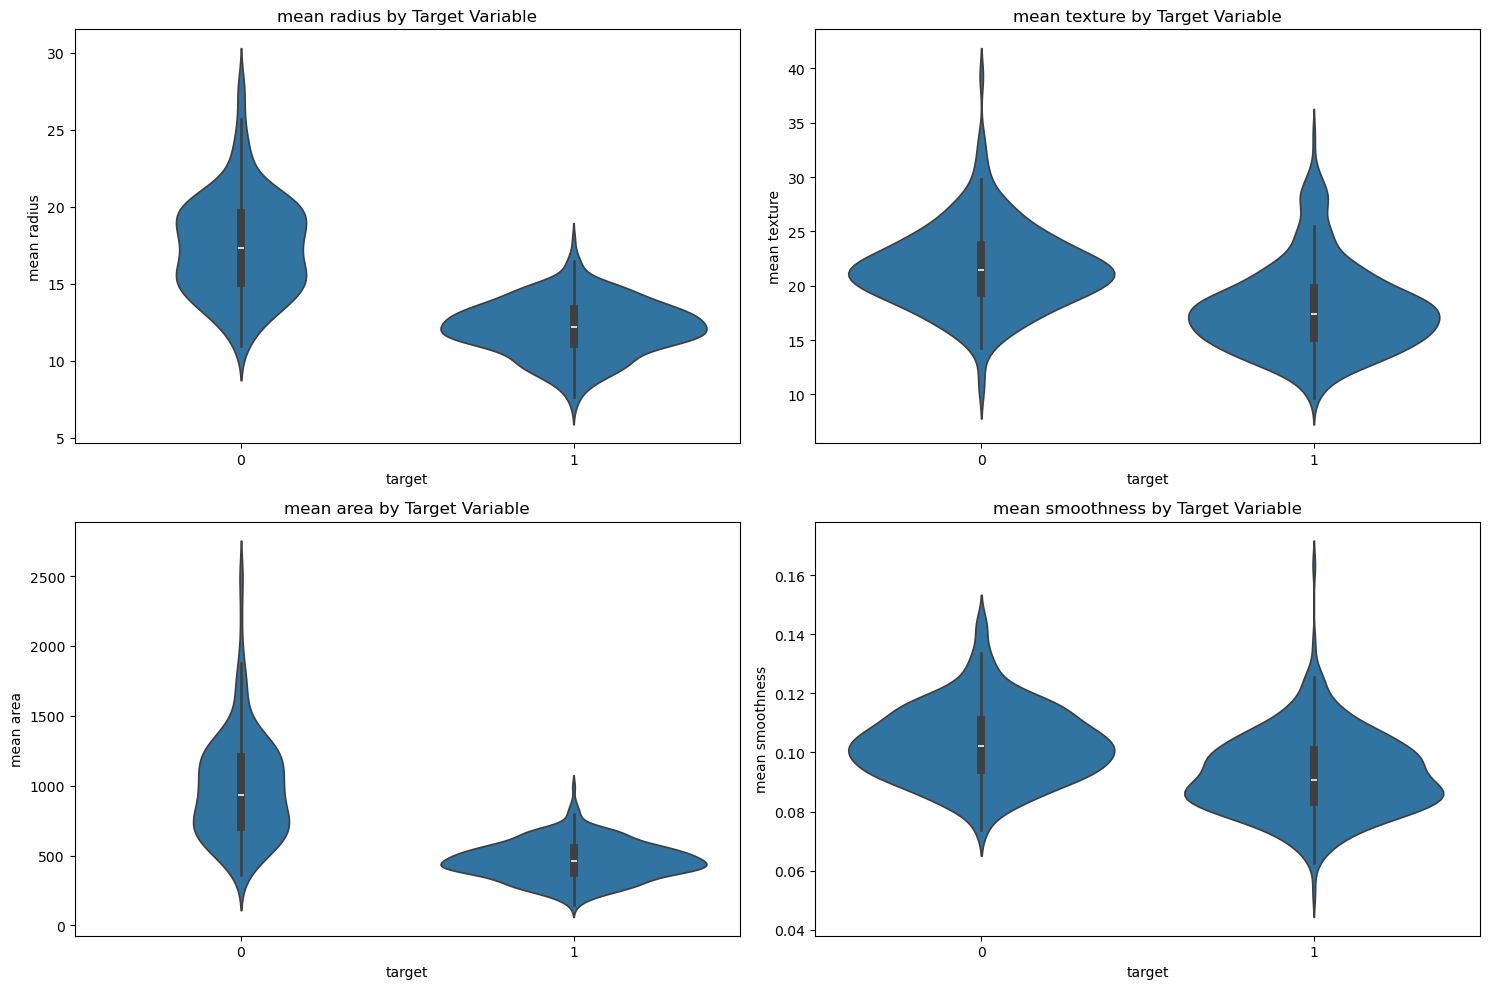

In [25]:
# Visualizing relationships between a few selected features and target variable
features_to_explore = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_explore):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target', y=feature, data=df)
    plt.title(f'{feature} by Target Variable')
plt.tight_layout()
plt.show()

**Pair Plot**

Using a pair plot can give you insights into how different features interact and how they relate to the target variable.

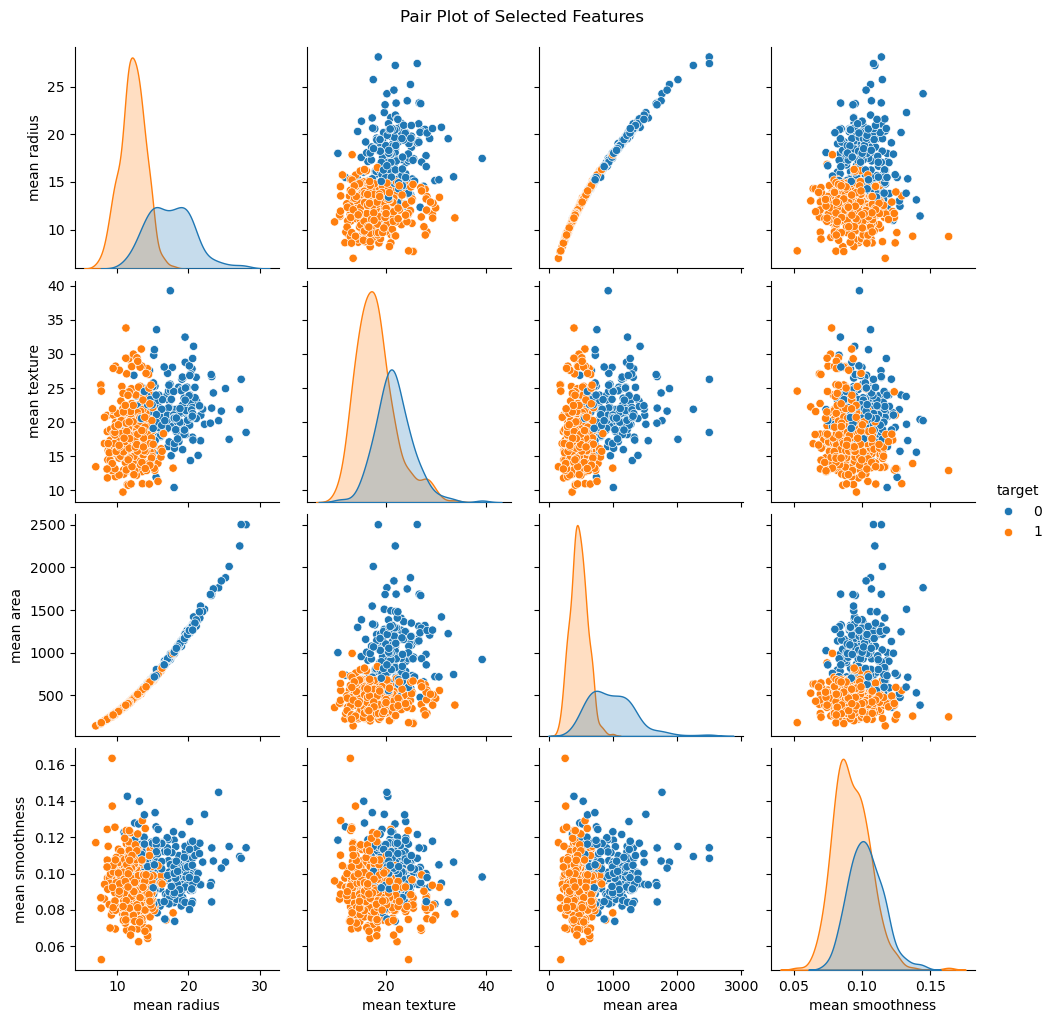

In [26]:
# Pair plot of selected features with the target variable
sns.pairplot(df, hue='target', vars=features_to_explore)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# <font color='Blue'>    </font>

### <font color='magenta'>6.Feature Engineering   </font>

In this dataset, we may not have many opportunities for feature engineering since the features are well-defined. However, we can scale them for better performance.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# <font color='Blue'>    </font>

### <font color='magenta'>7.Splitting Data into Train and Test   </font>

In [28]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=9)

# <font color='Blue'>    </font>

### <font color='magenta'>8. Model Building   </font>

In [30]:
# Initialize the XGBoost classifier
model = XGBClassifier(eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# <font color='Blue'>    </font>

### <font color='magenta'>9.Predications   </font>

In [31]:
# Make predictions on the test set

y_pred = model.predict(X_test)

# <font color='Blue'>    </font>

### <font color='magenta'>10.Metrics   </font>

Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



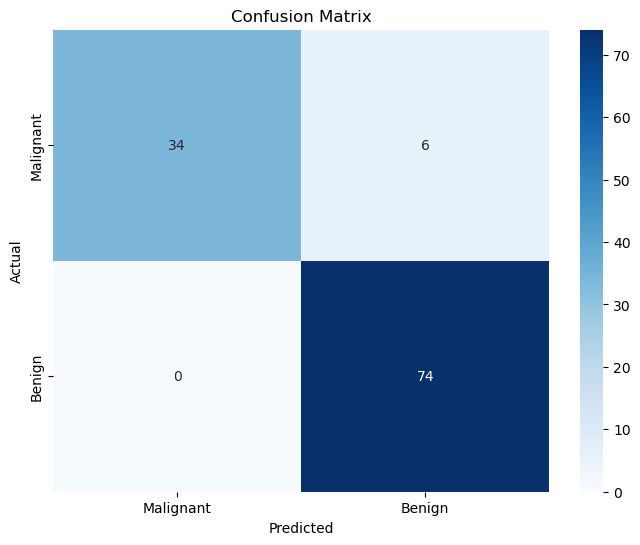

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# <font color='Blue'>    </font>

### <font color='magenta'>   </font>

# <font color='red'>END.   </font>